Shwe H. is currently working on this.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [2]:
# Ignore the warnings
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

## Data 

The training folder train_tsv consists of three types of information about the 1,200+ subjects. They are:


1. the targets (ADHD diagnosis and sex) -> sample_sub
2. functional MRI connectome matrices   -> test_connectome
3. socio-demographic information,       -> test_categorical and test_quant    e.g., subject’s “handedness” or “parent’s education level”, emotions (“Strength and Difficulties Questionnaire”), and parenting information (“Alabama Parenting Questionnaire”). These include both quantitative and categorical metadata.  
  
    **Friendly hint: Participants will need to process the categorical data (perhaps create dummy variables) and then combine this processed dataset with the functional connectome dataset to create a final training dataset to use in their models**

The test folder test_tsv consists of unseen data frames for 300+ subjects. These data frames are as follows:


1. functional MRI connectome matrices
2. socio-demographic, emotions, and parenting information


## Checking data columns and what kind of data 

In [10]:
#Create Dataframe of the Sample Submission
#This is the format that your submission to Kaggle will need to be in for Kaggle to accept it
sample_sub=pd.read_excel(f"/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx")
print(sample_sub.shape)
sample_sub.head()

(304, 3)


,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,0
2,ULliyEXjy4OV,0,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [4]:
#Create Dataframes of the Test Datasets of Data Dictionary
test_connectome=pd.read_csv(f"/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_categorical=pd.read_excel(f"/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx")
test_quant=pd.read_excel(f"/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx")

In [11]:
print(test_connectome.columns)
print(test_connectome.shape)
test_connectome.head()

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)
(304, 19901)


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [8]:
# test_quant.info()
print(test_quant.columns)
test_quant.head()

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [5]:
# test_categorical.info()
print(test_categorical.columns)
test_categorical.head()

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In the train data, we have:  (its confusing on how we have train data with test_ prefixes maybe lets change that later if the naming isn't making sense)

- sample_sub – contains ADHD labels (ADHD_outcome) and sex (Sex_f).
- test_quant – contains quantitative behavioral scores (e.g., SDQ, APQ, MRI age).
- test_categorical – contains demographic & categorical data (e.g., race, study site).
- test_connectome – contains functional connectivity matrices (19,900 features).

## When working with categorical data: 

1.  First, always check if our categorical data have missing values

    * If categorical data has missing values, decide whether to fill (fillna('Unknown')), impute (mode/most frequent value), or drop the rows depending on impact.
      
2. Encoding Categorical Data- Convert categorical columns into numerical representations:

   * One-Hot Encoding (OHE): Best for nominal categories (unordered). Use pd.get_dummies().

    * Label Encoding: Assigns a unique integer to each category (useful for tree-based models).
    * Target Encoding: Replaces categories with their mean target value (used in predictive modeling).
    * Ordinal Encoding: For ordered categories (e.g., small < medium < large).
    * Embeddings: Use deep learning for high-cardinality categorical features.
  
3. Scaling Quantitative Data
Normalize or standardize numeric features (MinMaxScaler, StandardScaler) to ensure compatibility with categorical features after encoding.

4. Merge the Data
Use pd.merge(df1, df2, on='common_key', how='inner/outer/left/right') to combine datasets.


5. Feature Engineering (if needed)
Create interaction terms between categorical and numerical features.
Aggregate categorical features (e.g., frequency encoding).

In [9]:
#Lets look at the train data to prepare the train data. 
#Create Dataframes of the Train Datasets of Data Dictionary
train_connectome=pd.read_csv(f"/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_quant=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
train_categorical=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
train_solution=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")


## Let's explore and understand Connectome Data 


The functional MRI data are used to extract a time series of activity per brain region, and these regions’ time series are correlated to obtain functional MRI connectome matrices. The columns could represents the correlation or statistical relationship between activity levels in two regions. The data is generated by using C-PAC(Configurable Pipeline for the Analysis of Connectomes) neuroimaging tool that processes fMRI data to generate functional connectivity matrices. It used time series correlations (e.g., Pearson correlation) between the 200 brain regions to construct the 200 × 200 matrix per participant.

1. The dataset represents a "functional connectome"
    - ADHD-related differences might appear as weaker/stronger connectivity in certain region pairs.
    - Typical regions of interest (ROIs) in ADHD studies include:
        - Default Mode Network (DMN) (often shows altered connectivity in ADHD).
        - Frontoparietal Network (FPN) (linked to attention control).
        - Cingulo-opercular Network (related to sustained attention).

2. Each row in the dataset is already preprocessed
    - Motion correction, normalization, and filtering were probably handled by C-PAC.
    - The values in each column represent the functional connectivity strength (e.g., correlation values) between pairs of brain regions.

3. Dimensionality is high (19,900 features), so we need feature reduction

- PCA: Extract the strongest connectivity patterns.
- t-SNE/UMAP: Check for natural clustering of ADHD vs. control.
- Feature selection: Identify region pairs with the strongest ADHD correlations.

More explainatory youtubes:
*  [Functional connectivity matrices processed through RBC](https://www.youtube.com/watch?v=OH3QH1ol4io)
*  [Functional Magnetic Resonance Imaging (fMRI)](https://www.youtube.com/watch?v=Zy0lpiuoET0&t=594s ) 


Could be useful pdf: https://drive.google.com/file/d/1rpS8G39lABdWJvsEKU-dJTwydrR5iMK-/view

Let’s break it down on the columns:

- The labels suggest the format Xthrow_Ythcolumn, meaning each feature represents the connection (edge) between brain region X and brain region Y.
- The highest indices are 199, meaning the brain is likely divided into 200 regions (indexed 0 to 199).
- The number of columns (excluding participant_id) is 19,901, which matches:


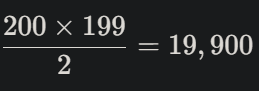



So, this confirms that each row is a flattened upper triangle of a 200 × 200 connectivity matrix.

### Plan

1.  Analyze & visualize functional connectome data (heatmap, PCA, t-SNE/UMAP, baseline model).
2.  Merge categorical data, retrain the model, and compare results.
3.  Merge categorical + quantitative data, retrain, and compare results.


### Visualizing a Sample Functional Connectivity Matrix

Pick one subject from the dataset.
Reshape their 19,900 features into a 200 × 200 matrix.
Plot a heatmap to show connectivity strength.

It looks like we can combine the test_categorical and test_quant datasets on the participant_id

In [7]:
# Join test_categorical and test_quant on participant_id
# Perform the join on the 'ID' feature
test_cat_quant = pd.merge(test_categorical, test_quant, on='participant_id', how='inner')

In [9]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [10]:
train_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [12]:
# Join train_categorical and train_quant on participant_id
# Perform the join on the 'ID' feature
train_cat_quant = pd.merge(train_categorical, train_quant, on='participant_id', how='inner')

Initial view shows that all variables except for the participant ID are numeric and the nulls only occur in the numeric featuresabs

The median will be used as a first attempt to handle the numeric nulls.  Try different methods for other iterations, another method may yield better results for your prediction stage

In this iteration, I want to use the median of the combined test and train datasets, which will require combining the two datasets

# Join Test and Train to Fill Nulls

In [ ]:
# Before combining the datasets, create a new field in each that identifies the source of the data, 
# this will allow the datasets to be split after data cleaning
test_cat_quant['Dataset'] = 'Test'
train_cat_quant['Dataset'] = 'Train'

# Union the two DataFrames
combined_cat = pd.concat([test_cat_quant, train_cat_quant], ignore_index=True)

combined_cat.head()

In [ ]:
combined_cat.info()

In [ ]:
# Fill nulls with median
# Remember to check other methods for filling nulls and does not have to be same method for all features
# Create a copy of the dataframe
combined_cat2 = combined_cat.copy()  # Create a copy of the DataFrame
combined_cat2 = combined_cat2.fillna(combined_cat.median(numeric_only=True))

combined_cat2.info()

# Separate Test and Train Data from combined_cat2 and append solution to the Train Dataframe

In [ ]:
# Splitting the dataframe based on a condition for a specific feature
feature_name = 'Dataset'  # Example feature to split on
value_to_split = 'Test'  # Value to filter on

# Create two dataframes based on the condition
df_split_test = combined_cat2[combined_cat2[feature_name] == value_to_split]
df_split_train = combined_cat2[combined_cat2[feature_name] != value_to_split]


In [ ]:
df_split_train.info()

In [ ]:
# Append Solution to df_split_train
train_solution = pd.merge(df_split_train, train_solution, on='participant_id', how='inner')
train_solution.info()

In [ ]:
#drop dataset from train_solution
train_solution = train_solution.drop(columns=['Dataset'])

In [ ]:
train_solution.info()

# Explore train_solution

Create Frequency Plots to Understand distributions

In [ ]:

# Create a new dataset without the 'participant_id' and any features with too many values for a frequency plot to make sense
merged_data_graph = train_solution.drop(columns=['participant_id','EHQ_EHQ_Total','MRI_Track_Age_at_Scan'])


In [ ]:
import matplotlib.pyplot as plt

# Function to create frequency plots for each column
def create_frequency_plots(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        if df[column].dtype in ['int64', 'float64']:  # Numerical data
            df[column].value_counts().sort_index().plot(kind='bar')
            plt.title(f"Frequency Plot of {column} (Numerical)")
            plt.xlabel(column)
            plt.ylabel("Frequency")
        else:  # Categorical or object data
            df[column].value_counts().plot(kind='bar')
            plt.title(f"Frequency Plot of {column} (Categorical)")
            plt.xlabel(column)
            plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Creating frequency plots for all columns in the merged dataset
create_frequency_plots(merged_data_graph, merged_data_graph.columns)


In [ ]:
# Look at outcomes

# Grouping data by Sex_F and ADHD_Outcome
adhd_sex_counts = merged_data_graph.groupby(['Sex_F', 'ADHD_Outcome']).size().unstack()

# Plotting the bar chart
ax = adhd_sex_counts.plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.title("ADHD Outcome by Sex")
plt.legend(title="ADHD Outcome")
plt.show()


# Show plot
plt.show()

Let's dive into correlation 

Wikipedia Definition of Correlation: "In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data." https://en.wikipedia.org/wiki/Correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#drop participant_id from the data we will evaluate for correlation since it is unique to each person
corr_data_graph = train_solution.drop(columns=['participant_id'])

#Compute the correlation matrix
correlation_matrix = corr_data_graph.corr()

# Filter correlations greater than 0.5 (absolute value) 
# Change the correlation coefficient threshold to explore the data more, try 0.6 or 0.7
#Remember the closer to 1 means two variables are highly correlated
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Display the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(strong_correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Strong Correlations (> 0.5) Heatmap")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix including 'Sex_F'
correlation_matrix = corr_data_graph.corr()

# Extract correlations of features with respect to 'Sex_F'
correlation_with_sex = correlation_matrix['Sex_F'].drop('Sex_F').sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_sex.index, y=correlation_with_sex.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Sex_F")
plt.title("Feature Correlations with Sex (Sex_F)")
plt.show()

# Display numerical correlation values
correlation_with_sex

Take some time to think about what a higher value close to 1 means when looking at data with respect to sex_F.  

Repeat this evaluation for ADHD_Outcome

Mutual Information is another way to assess relationships between features.  This is often considered more powerful than correlation since it evaluates more than linear relationships. Similar to correlation coefficient, a mutual information score of 0 or close to 0 means there is no or little to no relationship.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = corr_data_graph.copy()
y = X.pop('Sex_F')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes 
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

# Evaluate and Clean train_connectome and test_connectome

In [ ]:
train_connectome.info()

YIKES!  That is a lot of Columns.  We will have to use another method to identify fields with nulls

In [ ]:
# Identify features with nulls and their null counts
null_counts = train_connectome.isnull().sum()

# Filter features with at least one null
features_with_nulls = null_counts[null_counts > 0]

features_with_nulls 

No nulls in train_connectome! 

Now, let's check test_connectome for nulls

In [ ]:
# Identify features with nulls and their null counts
null_counts2 = test_connectome.isnull().sum()

# Filter features with at least one null
features_with_nulls2 = null_counts2[null_counts2 > 0]

features_with_nulls2

No nulls in test_connectome!

# Join Connectnomes and Categorical Data

In [ ]:
# Append connectnomes to train_solution
train_conn_solution = pd.merge(train_solution,train_connectome, on='participant_id', how='inner')
train_conn_solution.info()

In [ ]:
# Append connectnomes to df_split_test
test_conn = pd.merge(df_split_test,test_connectome, on='participant_id', how='inner')
test_conn.info()

In [ ]:
# Drop Dataset feature from test_conn
test_conn = test_conn.drop(columns=['Dataset'])

# Let's try predicting now and submit our results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Drop 'participant_id' from train and test data
X_train = train_conn_solution.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y_train = train_conn_solution[['ADHD_Outcome', 'Sex_F']]
X_test = test_conn.drop(columns=['participant_id'])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
# Try different versions of the model by changing activation or number of layers
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
model_hist=model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on test data
predictions = model.predict(X_test_scaled)
train_predictions = model.predict(X_train_scaled)


# Convert probabilities to binary outcomes
predicted_ADHD = (predictions[:, 0] > 0.5).astype(int)
predicted_Sex_F = (predictions[:, 1] > 0.5).astype(int)

train_predicted_ADHD = (train_predictions[:, 0] > 0.5).astype(int)
train_predicted_Sex_F = (train_predictions[:, 1] > 0.5).astype(int)


# Create a DataFrame with participant_id and predictions
test_predictions = test_conn[['participant_id']].copy()
test_predictions['ADHD_Outcome'] = predicted_ADHD
test_predictions['Sex_F'] = predicted_Sex_F

# Save results to CSV
test_predictions.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")


In [ ]:
#Check Output 
test_predictions

Evaluate Fit of Preduction on Train Dataset

In [ ]:
#Check learning curves

history_df = pd.DataFrame(model_hist.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))



Not a great looking fit, looks like we have some work to do on the model

In [ ]:
# Check F1-Score of Train Data
# Create ADHD_Outcome and Sex_f as singluar datasets to evaluate the fit of each prediction
actual_adhd = train_conn_solution[['ADHD_Outcome']]
actual_sex = train_conn_solution[['Sex_F']]

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 Score for adhd
adhd_f1 = f1_score(actual_adhd, train_predicted_ADHD)

print("F1 Score:", adhd_f1)

In [ ]:
# Calculate F1 Score for female
sex_f1 = f1_score(actual_sex, train_predicted_Sex_F)

print("F1 Score:", sex_f1)

F1 scores inidcates the model does a decent job with ADHD and sex on the train data, but don't forget we want a good fit on the test data which is our mystery piece and the learing curve was not great.

Think about how you can improve the model to better predict gender.  Could another layer help?  Should the sample size be changed?  Maybe change the null filling in method.

Before we make changes, let's check a few more metrics that evaluate model fit

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


# Calculate metrics
accuracy = accuracy_score(actual_sex, train_predicted_Sex_F)
precision = precision_score(actual_sex, train_predicted_Sex_F)
recall = recall_score(actual_sex, train_predicted_Sex_F)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Time to make a plan for how you will improve the model.